In [98]:
from __future__ import division

import numpy as np
from numpy import pi, sqrt,cos

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
%matplotlib inline

import seaborn as sns
#sns.set(style="darkgrid")
sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 1.5})

In [84]:
data_path = 'outputs/eady_A_k8_64_efunc.npz'
eady = np.load(data_path)

In [85]:
kappa = eady['kappa']
qn = eady['efunc'] 
N = eady['Nmodes']

# the critical level
cr = eady['c'].real

# vertical coordinate
dz = 1./N   # vertical resolution
z = np.arange(-dz/2,-1.-dz/2.,-dz)  # level array 

# horizontal coordinate
x = np.linspace(0,np.pi,100)

# grid
X,Z = np.meshgrid(x,z)

In [86]:
def cn(n,kappa):
    return -1./( kappa**2 + (n*pi)**2 )

In [87]:
# from qn to q
for i in range(N):
    if i == 0 : 
        q = qn[0]*np.ones(z.size)
        psi = qn[0]*np.ones(z.size)*cn(0,kappa)
    else: 
        q+= sqrt(2)*qn[i]*cos(i*pi*z)
        psi+= sqrt(2)*qn[i]*cos(i*pi*z)*cn(i,kappa)

In [88]:
qabs = np.abs(q)
qphase = np.arctan2(q.imag,q.real)
psiabs = np.abs(psi)
psiphase = np.arctan2(psi.imag,psi.real)

In [89]:
qabs = qabs.repeat(x.size).reshape(z.size,x.size)
qphase = qphase.repeat(x.size).reshape(z.size,x.size)
psiabs = psiabs.repeat(x.size).reshape(z.size,x.size)
psiphase = psiphase.repeat(x.size).reshape(z.size,x.size)

In [90]:
PV = qabs*np.cos(kappa*X + qphase)
PSI = psiabs*np.cos(kappa*X + psiphase)

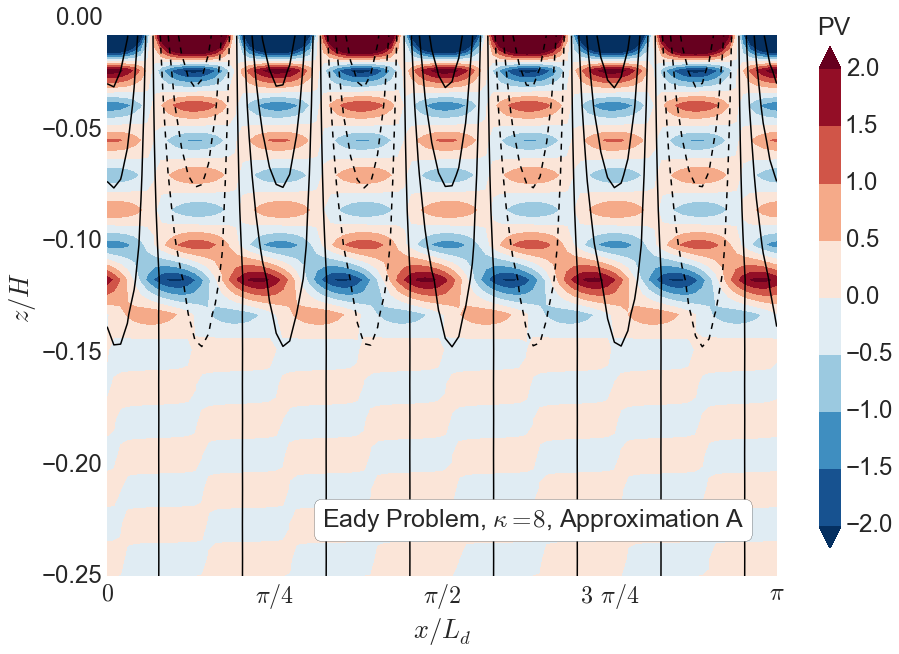

In [106]:
plt.figure(figsize=(15,10))
plt.contour(X,Z,PSI,colors='k')      
plt.contourf(X,Z,PV,np.linspace(-2.,2.,9),cmap='RdBu_r',extend='both') 
#plt.text(-0.325,zc,r' $z_c \rightarrow$',fontsize=25)
cb = plt.colorbar(extend='both',shrink=.9)
cb.ax.text(.0,1.075,'PV',rotation=0,fontsize=25)
plt.text(2., -.225, r"Eady Problem, $\kappa = 8$, Approximation A", size=25, rotation=0.,\
            ha="center", va="center",\
            bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(-.25,0)
plt.xticks([0.,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
        r'$3\,\pi/4$',r'$\pi$'])
plt.ylabel('$z/H$')
plt.xlabel(r'$x/L_d$')
plt.savefig('figs/wave-structure_pv_psi_kappa_8_A_N64.eps')

